In [1]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame
import collections
from datetime import datetime
import sys

In [2]:
from __future__ import division
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split as tts
from pivottablejs import pivot_ui
import csv
from numpy import *

In [3]:
data = pd.read_csv("C:/Users/barnesll/Desktop/Sustainment_Dashboard/Raw_Data/PS_Dashboard_Raw_Data/RAW_INCIDENTS.csv", engine='python')

In [4]:
df = pd.DataFrame(data)
df

,Incident ID,CB-ISEA,Common Name,Refined Common Name,Product Categorization Tier 1,Product Categorization Tier 2,Product Categorization Tier 3,Assigned Group,Command Name,Refined Command Name,...,Priority,IBOR,Incident Summary,Template Category Tier 1,Template Category Tier 2,Template Category Tier 3,Template Name,SOVT Document No.,CASREP DTG,CASREP Number
0,INC000003330268,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,NaN,NaN,FLEET SUPPORT MFOM,SOUTHWEST REGIONAL MAINTENANCE CENTER-AIM,SWRMC AIM,...,High,63.21%,SWRMC - NMD Trouble Ticket PECS24010 - CFR Res...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INC000003330280,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,NaN,NaN,FLEET SUPPORT MFOM,PEARL HARBOR NAVAL SHIPYARD AND INTERMEDIATE M...,NAVAL SHIPYARD PEARL HARBOR,...,Low,95.02%,Need a password reset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INC000001056341,APPLICATIONS,NTCSS,NTCSS,PURCHASE REQUEST,PURCHASING,NaN,NORFOLK PURCHASING,SPACE AND NAVAL WARFARE SYSTEMS CENTER CENTER ...,SSC LANT NORFOLK,...,Medium,93.28%,Purchase Request for Support and Maintenance o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INC000001376847,APPLICATIONS,NTCSS,NTCSS,PURCHASE REQUEST,PURCHASING,NaN,NORFOLK PURCHASING,SPACE AND NAVAL WARFARE SYSTEMS CENTER CENTER ...,SSC LANT NORFOLK,...,Medium,86.47%,Purchase Request for Support and Maintenance o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INC000001376869,APPLICATIONS,NTCSS,NTCSS,PURCHASE REQUEST,PURCHASING,NaN,NORFOLK PURCHASING,SPACE AND NAVAL WARFARE SYSTEMS CENTER CENTER ...,SSC LANT NORFOLK,...,Medium,86.47%,Maintenance and Support license renewal for FY...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,INC000001376887,APPLICATIONS,NTCSS,NTCSS,PURCHASE REQUEST,PURCHASING,NaN,NORFOLK PURCHASING,SPACE AND NAVAL WARFARE SYSTEMS CENTER CENTER ...,SSC LANT NORFOLK,...,Medium,86.47%,Maintenance and Support license renewal for FY...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,INC000001838554,APPLICATIONS,NTCSS,NTCSS,PURCHASE REQUEST,PURCHASING,NaN,NORFOLK PURCHASING,SPACE AND NAVAL WARFARE SYSTEMS CENTER CENTER ...,SSC LANT NORFOLK,...,High,81.73%,As Directed by the IPT submitting PR for 2 Mad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,INC000002264454,APPLICATIONS,NTCSS,NTCSS,NAVAL TACTICAL COMMAND SUPPORT SYSTEM,SYSTEMS,NaN,NORFOLK SYSTEMS ENGINEERING,USS FORT MCHENRY LSD 43,FORT MCHENRY,...,Low,95.02%,NTCSS DBCC Errors,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,INC000002441949,APPLICATIONS,NTCSS,NTCSS,NAVAL TACTICAL COMMAND SUPPORT SYSTEM,NALCOMIS,NaN,NORFOLK SYSTEMS ENGINEERING,SPACE AND NAVAL WARFARE SYSTEMS CENTER ATLANTIC,SSC LANT,...,Critical,50.34%,There are several discrepancies and flaws in t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,INC000002442100,APPLICATIONS,NTCSS,NTCSS,NAVAL TACTICAL COMMAND SUPPORT SYSTEM,NALCOMIS,NaN,NORFOLK SYSTEMS ENGINEERING,SPACE AND NAVAL WARFARE SYSTEMS CENTER ATLANTIC,SSC LANT,...,Critical,50.34%,There are several discrepancies and flaws in t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2 = df.drop(['Incident ID', 'Common Name', 'Product Categorization Tier 1', 'Product Categorization Tier 2', 'Product Categorization Tier 3', 'Assigned Group', 'Command Name', 'Refined Homeport', 'Last Modified Date',
        'Submit Date', 'Impact', 'Urgency', 'Weight', 'Incident Service Type', 'Incident Summary', 'Incident Service Type', 'Operational  Categorization Tier 1', 'Operational  Categorization Tier 2', 'Operational  Categorization Tier 3',
        'Priority', 'IBOR', 'Template Category Tier 1', 'Template Category Tier 2', 'Template Category Tier 3', 'Template Name', 'CASREP DTG', 'CASREP Number', 'SOVT Document No.'], axis=1)

In [6]:
#pd.options.display.max_rows = 50714      # view entire dataframe

In [7]:
df3 = df2.dropna(axis=0, how='any')
print(df3.shape)
df3

(50714, 6)


,CB-ISEA,Refined Common Name,Refined Command Name,Incident Age (Days),Status,Proactive Sustainment Action
0,APPLICATIONS,MFOM,SWRMC AIM,1,Assigned,No
1,APPLICATIONS,MFOM,NAVAL SHIPYARD PEARL HARBOR,1,Assigned,No
2,APPLICATIONS,NTCSS,SSC LANT NORFOLK,506,Assigned,No
3,APPLICATIONS,NTCSS,SSC LANT NORFOLK,456,Assigned,No
4,APPLICATIONS,NTCSS,SSC LANT NORFOLK,456,Assigned,No
5,APPLICATIONS,NTCSS,SSC LANT NORFOLK,456,Assigned,No
6,APPLICATIONS,NTCSS,SSC LANT NORFOLK,355,Assigned,No
7,APPLICATIONS,NTCSS,FORT MCHENRY,249,Assigned,No
8,APPLICATIONS,NTCSS,SSC LANT,202,Assigned,No
9,APPLICATIONS,NTCSS,SSC LANT,202,Assigned,No


In [8]:
df3['Status'].describe()

count      50714
unique         5
top       Closed
freq       46820
Name: Status, dtype: object

In [9]:
df4 = df3[df3.Status == 'Closed']
print(df4.shape)    

(46820, 6)


In [10]:
df4

,CB-ISEA,Refined Common Name,Refined Command Name,Incident Age (Days),Status,Proactive Sustainment Action
3171,APPLICATIONS,MFOM,SSC LANT NORFOLK,164,Closed,No
3172,APPLICATIONS,MFOM,SSC LANT,184,Closed,No
3173,APPLICATIONS,MFOM,SIROCCO,207,Closed,No
3174,APPLICATIONS,MFOM,PORTER,199,Closed,No
3175,APPLICATIONS,MFOM,FIREBOLT,196,Closed,No
3176,APPLICATIONS,MFOM,MARMC,75,Closed,No
3177,APPLICATIONS,MFOM,SSC LANT NORFOLK,130,Closed,No
3178,APPLICATIONS,MFOM,JASON DUNHAM,100,Closed,No
3179,APPLICATIONS,MFOM,COLUMBIA,75,Closed,No
3180,APPLICATIONS,MFOM,TEMPEST,132,Closed,No


In [11]:
df4['Proactive Sustainment Action'].describe()

count     46820
unique        2
top          No
freq      43222
Name: Proactive Sustainment Action, dtype: object

In [12]:
df4['CB-ISEA'].describe()

count              46820
unique                13
top       CYBER SECURITY
freq               14166
Name: CB-ISEA, dtype: object

In [13]:
df4['Refined Common Name'].describe()

count     46820
unique       71
top         CND
freq      11917
Name: Refined Common Name, dtype: object

In [14]:
df4['Refined Command Name'].describe()

count                             46820
unique                              393
top       NAVAL NETWORK WARFARE COMMAND
freq                               4767
Name: Refined Command Name, dtype: object

In [15]:
df5 = df4[df4['Proactive Sustainment Action'] == 'Yes']
print(df5.shape) 
df5

(3598, 6)


,CB-ISEA,Refined Common Name,Refined Command Name,Incident Age (Days),Status,Proactive Sustainment Action
8084,APPLICATIONS,NTCSS,GLADIATOR,40,Closed,Yes
8585,APPLICATIONS,NTCSS,WINSTON S CHURCHILL,113,Closed,Yes
8661,APPLICATIONS,NTCSS,ABRAHAM LINCOLN,177,Closed,Yes
8787,APPLICATIONS,NTCSS,DEVASTATOR,93,Closed,Yes
8797,APPLICATIONS,NTCSS,GEORGE WASHINGTON,94,Closed,Yes
9048,APPLICATIONS,NTCSS,SSC LANT NORFOLK,15,Closed,Yes
9060,APPLICATIONS,NTCSS,DEVASTATOR,41,Closed,Yes
9067,APPLICATIONS,NTCSS,GONZALEZ,31,Closed,Yes
9074,APPLICATIONS,NTCSS,GEORGE WASHINGTON,9,Closed,Yes
9081,APPLICATIONS,NTCSS,MALS ELEVEN,15,Closed,Yes


In [16]:
frequency = collections.Counter(df5['CB-ISEA'])
frequency_sorted_keys = sorted(frequency, key=frequency.get, reverse=True)
for r in frequency_sorted_keys:
    print(r, frequency[r])

ISR/IO 1453
CYBER SECURITY 914
SUB RADIO ROOMS 449
APPLICATIONS 343
MARITIME/EXPEDITIONARY C2 181
RADIO 128
SHORE NET 62
TACNET 60
NAVIGATION 4
MESSAGING 2
SATCOM 2


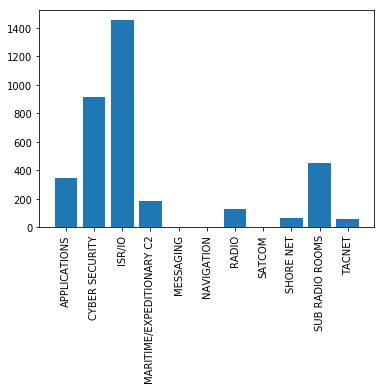

In [17]:
plt.bar(range(len(frequency)), list(frequency.values()), align='center')
plt.xticks(range(len(frequency)), list(frequency.keys()), rotation='vertical')
plt.show()

In [18]:
#Example to find a particular pattern and find the frequency within the data
i = 0
days_sum = 0
count = 0
while i < len(df5):
    if df5['CB-ISEA'].iloc[i] == 'CYBER SECURITY' and df5['Refined Common Name'].iloc[i] == 'CND' and df5['Refined Command Name'].iloc[i] == 'SSC LANT':
        count = count + 1
        days_sum = days_sum + df5['Incident Age (Days)'].iloc[i]
        mean = days_sum / count
    i = i + 1
print("Count is :" + str(count))
print("Total days is :" + str(days_sum))
if count == 0:
    print("Mean is : 0")
else: 
    print("Mean is :" + str(mean))

Count is :443
Total days is :1135
Mean is :2.5620767494356658


In [30]:
frequency2 = collections.Counter(df5['CB-ISEA'])
cbisea_array = np.array(frequency2.keys())
print(cbisea_array)
print(len(frequency2))
#np.prod(cbisea_array.shape)

dict_keys(['APPLICATIONS', 'CYBER SECURITY', 'ISR/IO', 'MARITIME/EXPEDITIONARY C2', 'MESSAGING', 'NAVIGATION', 'RADIO', 'SATCOM', 'SHORE NET', 'SUB RADIO ROOMS', 'TACNET'])
11


In [31]:
frequency3 = collections.Counter(df5['Refined Command Name'])
command_array = np.array(frequency3.keys())
print(command_array)
len(frequency3)
#print(command_array.size)

dict_keys(['GLADIATOR', 'WINSTON S CHURCHILL', 'ABRAHAM LINCOLN', 'DEVASTATOR', 'GEORGE WASHINGTON', 'SSC LANT NORFOLK', 'GONZALEZ', 'MALS ELEVEN', 'MALS TWENTY-NINE', 'MALS FOURTEEN', 'NITZE', 'STERETT', 'KEARSARGE', 'DEWEY', 'OAK HILL', 'SENTRY', 'MALS TWELVE', 'STOUT', 'THEODORE ROOSEVELT', 'MILIUS', 'MCCAMPBELL', 'CARL VINSON', 'ESSEX', 'SAN JACINTO', 'BOXER', 'ARLEIGH BURKE', 'BAINBRIDGE', 'MAHAN', 'SSC LANT', 'CAPE ST GEORGE', 'MASON', 'NORMANDY', 'STETHEM', 'HAMPTON', 'NIMITZ', 'MAKIN ISLAND', 'LAKE CHAMPLAIN', 'FORREST SHERMAN', 'VELLA GULF', 'PORT ROYAL', 'MUSTIN', 'MICHAEL MURPHY', 'RUSSELL', 'LAKE ERIE', 'FORT MCHENRY', 'JOHN FINN', 'JOHN PAUL JONES', 'COLE', 'SAN DIEGO', 'SAMPSON', 'SOMERSET', 'LEYTE GULF', 'GETTYSBURG', 'DONALD COOK', 'LABOON', 'COLORADO', 'HOWARD', 'CHUNG-HOON', 'MCFAUL', 'MOUNT WHITNEY', 'ANCHORAGE', 'CHAFEE', 'ASHLAND', 'KIDD', 'AMERICA', 'JOHN C STENNIS', 'MALS THIRTY-NINE', 'PIONEER', 'BLUE RIDGE', 'PINCKNEY', 'PRINCETON', 'EMORY S LAND', 'CHAMPION', 

249

In [32]:
frequency4 = collections.Counter(df5['Refined Common Name'])
common_name_array = np.array(frequency4.keys())
print(common_name_array)
print(len(frequency4))
#print(common_name_array.size)

dict_keys(['NTCSS', 'CND', 'CRYPTO PRODUCTS', 'PKI', 'AIS', 'CCOP', 'DCGS-N', 'SSEE INC E', 'SSEE INC F', 'TACMOBILE', 'GCCS-J', 'GCCS-M', 'TBMCS', 'USMC ESS', 'NAVMACSII', 'NAVSSI', 'BFTN', 'DAMA', 'EPLRS', 'HF (AFLOAT)', 'HFSAR-ALE', 'MINI-DAMA', 'TVS', 'UHF LOS', 'UHF SATCOM', 'NMT', 'STACC-ADMS', 'STACC-SCI NETWORKS', 'STACC-TSW NETWORK', 'UNIFIED CAPABILITY/SHORE TELEPHONY', 'CSRR', 'CSRR RFDACS', 'ADNS', 'CANES', 'CENTRIXS', 'SCI NETWORKS', 'SUBLAN'])
37


In [25]:
%%time
with open('psAveTest.csv', 'w') as f:
    fieldnames = ['CB-ISEA', 'Refined Common Name', 'Refined Command Name', 'Count', 'Total Days', 'Average Lifetime']
    thewriter = csv.DictWriter(f, fieldnames=fieldnames)
    thewriter.writeheader()
    
    i = 0
    while i < 11:      #len(cbisea_array)
    
        j = 0
        while j < 37:    #len(common_name_array)
        
            k = 0
            while k < 249:    #len(command_array)
                
                m = 0
                days_sum = 0
                count = 0
                while m < len(df5):
                    
                    if df5['CB-ISEA'].iloc[m] == cbisea_array[i] and df5['Refined Common Name'].iloc[m] == common_name_array[j] and df5['Refined Command Name'].iloc[m] == command_array[k]:
                        count = count + 1
                        days_sum = days_sum + df5['Incident Age (Days)'].iloc[m]
                        mean = days_sum / count

                    m = m + 1
            
                if count == 0:
                    pass
                else:
                    thewriter.writerow({'CB-ISEA': cbisea_array[i], 'Refined Common Name': common_name_array[j], 'Refined Command Name': command_array[k], 'Count' : count, 'Total Days': days_sum, 'Average Lifetime' : mean})
                
                k += 1
            j += 1
        i += 1
f.close()

IndexError: too many indices for array

In [23]:
pivot_ui(df5)

In [24]:
pivot_ui(df3) # pivot table with all values